In [1]:
import pandas as pd
import missingno as msno

## Data Loading

There were 3 sets of datasets:
1. ODI Matches
2. T20 Matches
3. Test Matches

Each of the above datasets have 3 sub-types :
1. Batters
2. Ballers
3. Fielders

_* For my analysis I'll be considering only the ODI matches._

In [2]:
ballers = pd.read_csv('data/Bowling_ODI.csv')
batters = pd.read_csv('data/ODI data.csv')
fielders = pd.read_csv('data/Fielding_ODI.csv')

print('Ballers Dataset:\n********\n',ballers.head(),'\n\n')
print('Batters Dataset:\n********\n',batters.head(),'\n\n')
print('Fielders Dataset:\n********\n',fielders.head(),'\n\n')

Ballers Dataset:
********
    Unnamed: 0                        Player       Span  Mat Inns  Balls  \
0           0  M Muralitharan (Asia/ICC/SL)  1993-2011  350  341  18811   
1           1             Wasim Akram (PAK)  1984-2003  356  351  18186   
2           2            Waqar Younis (PAK)  1989-2003  262  258  12698   
3           3          WPUJC Vaas (Asia/SL)  1994-2008  322  320  15775   
4           4  Shahid Afridi (Asia/ICC/PAK)  1996-2015  398  372  17670   

    Runs Wkts   BBI    Ave  Econ    SR   4   5  Unnamed: 13  
0  12326  534  7/30  23.08  3.93  35.2  15  10          NaN  
1  11812  502  5/15  23.52  3.89  36.2  17   6          NaN  
2   9919  416  7/36  23.84  4.68  30.5  14  13          NaN  
3  11014  400  8/19  27.53  4.18  39.4   9   4          NaN  
4  13632  395  7/12  34.51  4.62  44.7   4   9          NaN   


Batters Dataset:
********
    Unnamed: 0                       Player       Span  Mat Inns  NO   Runs  \
0           0         SR Tendulkar (INDIA)

## Missing Values Analysis

Using missingno library for visualizing finding missing valued columns.

### Ballers Dataset

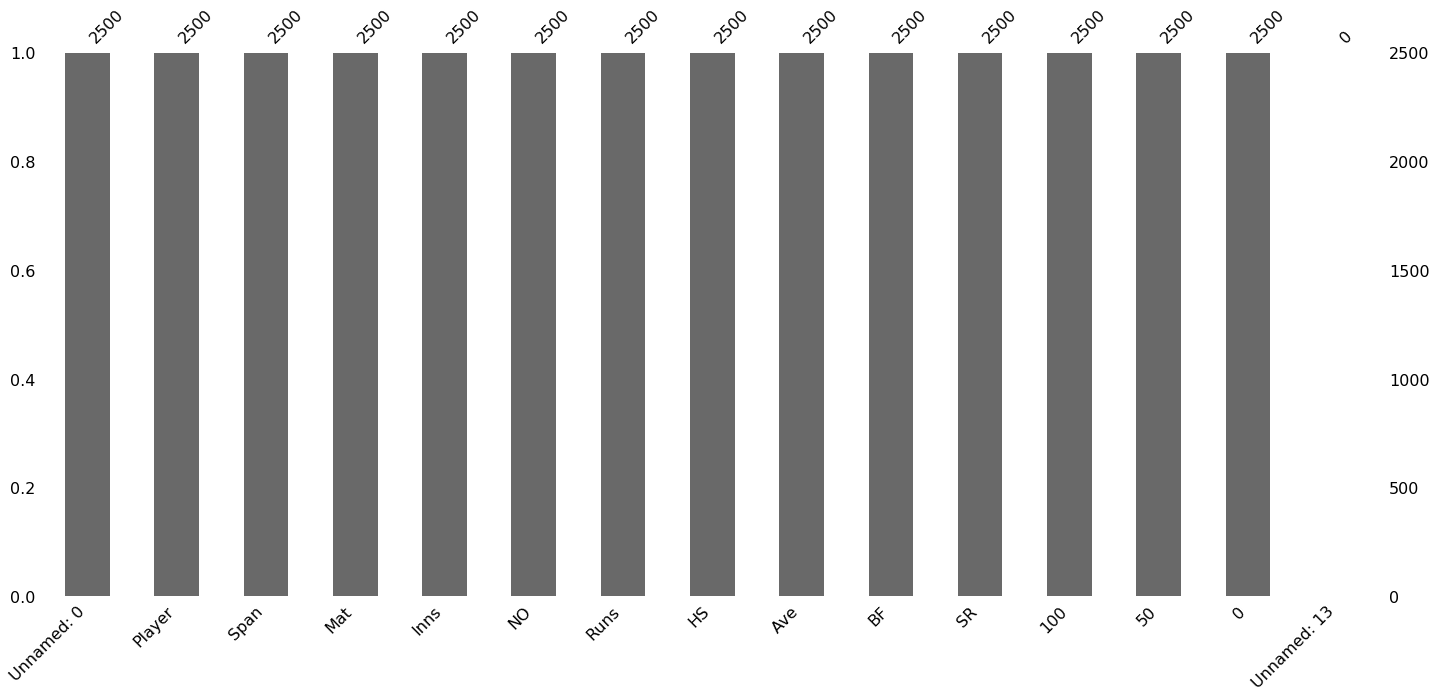

In [3]:
msno.bar(batters);

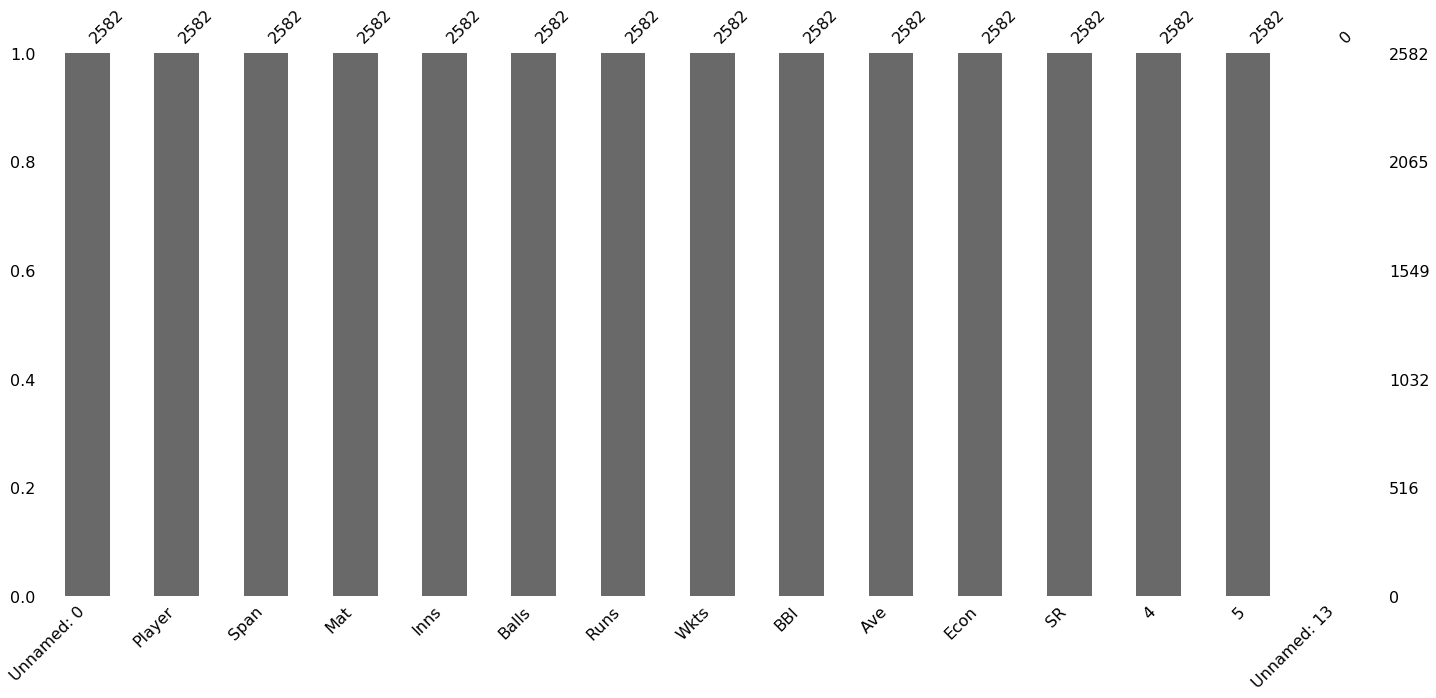

In [4]:
msno.bar(ballers);

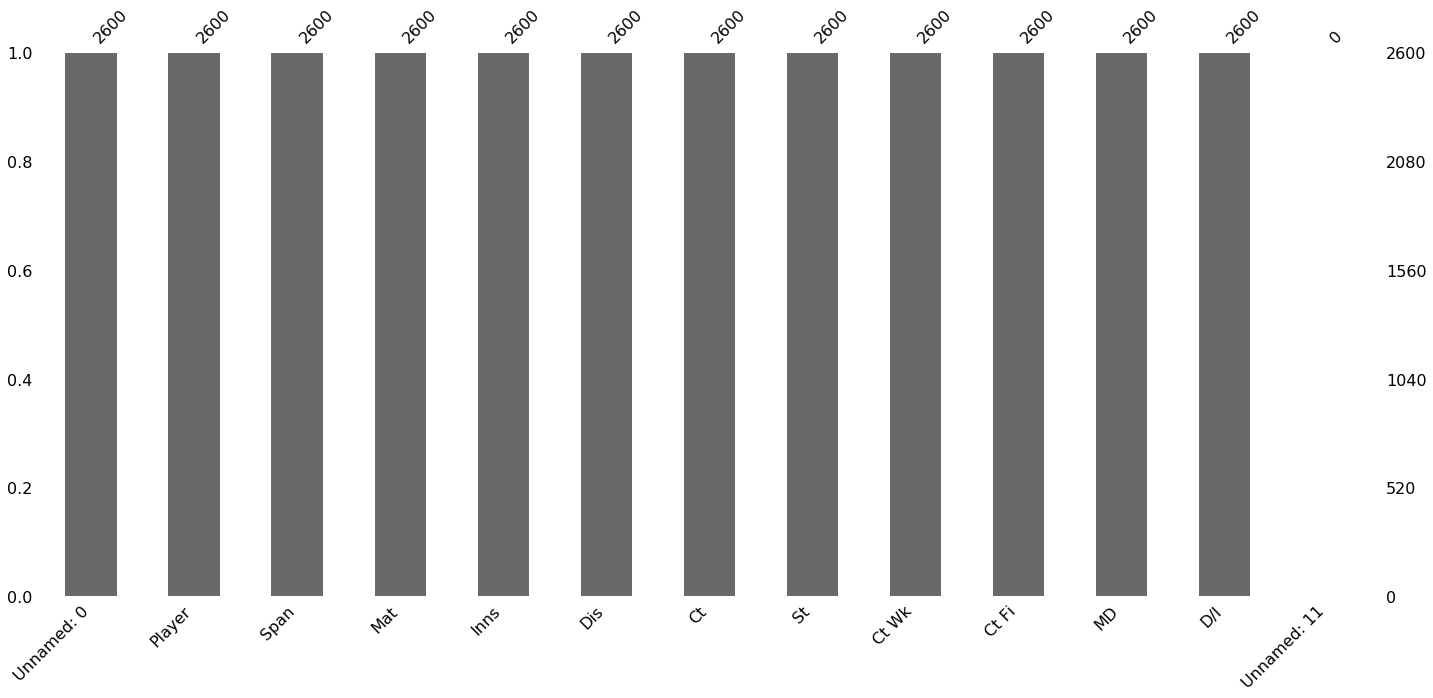

In [5]:
msno.bar(fielders);

> The only suspicious columns are the unnamed columns. 

>These columns creeped in because of the uploader forget to remove them.

## Data Cleaning

### Removing Unnamed columns from all datasets

In [6]:
datasets = {
    'batters':batters,
    'ballers':ballers,
    'fielders':fielders
}

In [7]:
for dataset_name,dataset in datasets.items():
    print(f'{dataset_name.upper()}\'s Columns before:',', '.join(dataset.columns))
    to_drop = [col_name for col_name in dataset.columns if 'Unnamed' in col_name]
    dataset.drop(to_drop,axis=1,inplace=True)    
    print(f'{dataset_name.upper()}\'s Columns after:',', '.join(dataset.columns))

BATTERS's Columns before: Unnamed: 0, Player, Span, Mat, Inns, NO, Runs, HS, Ave, BF, SR, 100, 50, 0, Unnamed: 13
BATTERS's Columns after: Player, Span, Mat, Inns, NO, Runs, HS, Ave, BF, SR, 100, 50, 0
BALLERS's Columns before: Unnamed: 0, Player, Span, Mat, Inns, Balls, Runs, Wkts, BBI, Ave, Econ, SR, 4, 5, Unnamed: 13
BALLERS's Columns after: Player, Span, Mat, Inns, Balls, Runs, Wkts, BBI, Ave, Econ, SR, 4, 5
FIELDERS's Columns before: Unnamed: 0, Player, Span, Mat, Inns, Dis, Ct, St, Ct Wk, Ct Fi, MD, D/I, Unnamed: 11
FIELDERS's Columns after: Player, Span, Mat, Inns, Dis, Ct, St, Ct Wk, Ct Fi, MD, D/I


### Validating datatypes of all columns

In [8]:
for dataset_name,dataset in datasets.items():
    print(f'{dataset_name.upper()}\'s data types:\n************\n',dataset.dtypes,'\n\n')

BATTERS's data types:
************
 Player    object
Span      object
Mat        int64
Inns      object
NO        object
Runs      object
HS        object
Ave       object
BF        object
SR        object
100       object
50        object
0         object
dtype: object 


BALLERS's data types:
************
 Player    object
Span      object
Mat        int64
Inns      object
Balls     object
Runs      object
Wkts      object
BBI       object
Ave       object
Econ      object
SR        object
4         object
5         object
dtype: object 


FIELDERS's data types:
************
 Player     object
Span       object
Mat         int64
Inns        int64
Dis         int64
Ct          int64
St          int64
Ct Wk       int64
Ct Fi       int64
MD         object
D/I       float64
dtype: object 




> All data except player's name should be numeric!

> Datatypes needs to be corrected

### Correcting datatypes for all columns

In [9]:
batters['0'] = batters['0'].apply(lambda x: int(x) if x != '-' else 0)
batters['100'] = batters['100'].apply(lambda x: int(x) if x != '-' else 0)
batters['50'] = batters['50'].apply(lambda x: int(x) if x != '-' else 0)
batters['Ave'] = batters['Ave'].apply(lambda x: float(x) if x != '-' else 0)
batters['BF'] = batters['BF'].apply(lambda x: int(x) if x != '-' else 0)
batters['HS'] = batters['HS'].apply(lambda x: int(x.replace('*','')) if x != '-' else 0)
batters['Inns'] = batters['Inns'].apply(lambda x: int(x) if x != '-' else 0)
batters['NO'] = batters['NO'].apply(lambda x: int(x) if x != '-' else 0)
batters['Runs'] = batters['Runs'].apply(lambda x: int(x) if x != '-' else 0)
batters['SR'] = batters['SR'].apply(lambda x: float(x) if x != '-' else 0)

In [10]:
ballers['4'] = ballers['4'].apply(lambda x: int(x) if x != '-' else 0)
ballers['5'] = ballers['5'].apply(lambda x: int(x) if x != '-' else 0)
ballers['Ave'] = ballers['Ave'].apply(lambda x: float(x) if x != '-' else 0)
ballers['Econ'] = ballers['Econ'].apply(lambda x: float(x) if x != '-' else 0)
ballers['Balls'] = ballers['Balls'].apply(lambda x: int(x) if x != '-' else 0)
ballers['Runs'] = ballers['Runs'].apply(lambda x: int(x) if x != '-' else 0)
ballers['SR'] = ballers['SR'].apply(lambda x: float(x) if x != '-' else 0)
ballers['Wkts'] = ballers['Wkts'].apply(lambda x: int(x) if x != '-' else 0)
ballers['Inns'] = ballers['Inns'].apply(lambda x: int(x) if x != '-' else 0)

In [11]:
fielders.Ct = fielders.Ct.apply(lambda x: int(x) if x != '-' else 0)
fielders['Ct Fi'] = fielders['Ct Fi'].apply(lambda x: int(x) if x != '-' else 0)
fielders['Ct Wk'] = fielders['Ct Wk'].apply(lambda x: int(x) if x != '-' else 0)
fielders['D/I'] = fielders['D/I'].apply(lambda x: float(x) if x != '-' else 0)
fielders['Dis'] = fielders['Dis'].apply(lambda x: int(x) if x != '-' else 0)
fielders['Inns'] = fielders['Inns'].apply(lambda x: int(x) if x != '-' else 0)
fielders['St'] = fielders['St'].apply(lambda x: int(x) if x != '-' else 0)

In [12]:
batters['start'] = batters['Span'].apply(lambda x: int(x.split('-')[0]))
batters['end'] = batters['Span'].apply(lambda x: int(x.split('-')[1]))

ballers['start'] = ballers['Span'].apply(lambda x: int(x.split('-')[0]))
ballers['end'] = ballers['Span'].apply(lambda x: int(x.split('-')[1]))

fielders['start'] = fielders['Span'].apply(lambda x: int(x.split('-')[0]))
fielders['end'] = fielders['Span'].apply(lambda x: int(x.split('-')[1]))

batters.drop('Span',axis=1,inplace=True)
ballers.drop('Span',axis=1,inplace=True)
fielders.drop('Span',axis=1,inplace=True)

In [13]:
for dataset_name,dataset in datasets.items():
    print(f'{dataset_name.upper()}\'s data types:\n************\n',dataset.dtypes,'\n\n')

BATTERS's data types:
************
 Player     object
Mat         int64
Inns        int64
NO          int64
Runs        int64
HS          int64
Ave       float64
BF          int64
SR        float64
100         int64
50          int64
0           int64
start       int64
end         int64
dtype: object 


BALLERS's data types:
************
 Player     object
Mat         int64
Inns        int64
Balls       int64
Runs        int64
Wkts        int64
BBI        object
Ave       float64
Econ      float64
SR        float64
4           int64
5           int64
start       int64
end         int64
dtype: object 


FIELDERS's data types:
************
 Player     object
Mat         int64
Inns        int64
Dis         int64
Ct          int64
St          int64
Ct Wk       int64
Ct Fi       int64
MD         object
D/I       float64
start       int64
end         int64
dtype: object 




### Dropping all duplicates

In [14]:
for dataset_name,dataset in datasets.items():
    print(f'{dataset_name.upper()}\'s before {dataset.shape[0]} rows')
    dataset.drop_duplicates(inplace=True)
    print(f'{dataset_name.upper()}\'s after {dataset.shape[0]} rows')

BATTERS's before 2500 rows
BATTERS's after 2500 rows
BALLERS's before 2582 rows
BALLERS's after 2582 rows
FIELDERS's before 2600 rows
FIELDERS's after 50 rows


### Player Names are mixed with Region Names

In [15]:
for dataset_name,dataset in datasets.items():
    print(f'{dataset_name.upper()}\'s before:\n********')
    print(dataset['Player'].head(),'\n\n')
    player_names = dataset['Player'].apply(lambda x:x.split('(')[0].strip().upper().replace(')',''),)
    region_names = dataset['Player'].apply(lambda x:x.split('(')[-1].strip().upper().replace(')',''))
    dataset['Player'] = player_names
    dataset['Region'] = region_names
    print(f'{dataset_name.upper()}\'s after:\n********')
    print(dataset[['Player','Region']].head(),'\n\n')

BATTERS's before:
********
0           SR Tendulkar (INDIA)
1    KC Sangakkara (Asia/ICC/SL)
2           RT Ponting (AUS/ICC)
3        ST Jayasuriya (Asia/SL)
4     DPMD Jayawardene (Asia/SL)
Name: Player, dtype: object 


BATTERS's after:
********
             Player       Region
0      SR TENDULKAR        INDIA
1     KC SANGAKKARA  ASIA/ICC/SL
2        RT PONTING      AUS/ICC
3     ST JAYASURIYA      ASIA/SL
4  DPMD JAYAWARDENE      ASIA/SL 


BALLERS's before:
********
0    M Muralitharan (Asia/ICC/SL)
1               Wasim Akram (PAK)
2              Waqar Younis (PAK)
3            WPUJC Vaas (Asia/SL)
4    Shahid Afridi (Asia/ICC/PAK)
Name: Player, dtype: object 


BALLERS's after:
********
           Player        Region
0  M MURALITHARAN   ASIA/ICC/SL
1     WASIM AKRAM           PAK
2    WAQAR YOUNIS           PAK
3      WPUJC VAAS       ASIA/SL
4   SHAHID AFRIDI  ASIA/ICC/PAK 


FIELDERS's before:
********
0    KC Sangakkara (Asia/ICC/SL)
1         AC Gilchrist (AUS/ICC)
2      

### Correcting Regions Manually

In [16]:
erroneous_regions = set()
[erroneous_regions.add(regions) for regions in fielders[fielders.Region.str.contains('/')].Region.unique()]
[erroneous_regions.add(regions) for regions in batters[batters.Region.str.contains('/')].Region.unique()]
[erroneous_regions.add(regions) for regions in ballers[ballers.Region.str.contains('/')].Region.unique()]
erroneous_regions = list(erroneous_regions)
erroneous_regions.sort()
print('Before',erroneous_regions)

Before ['AFR/ICC/SA', 'AFR/KENYA', 'AFR/SA', 'AFR/ZIM', 'ASIA/BDESH', 'ASIA/ICC/INDIA', 'ASIA/ICC/PAK', 'ASIA/ICC/SL', 'ASIA/INDIA', 'ASIA/PAK', 'ASIA/SL', 'AUS/ICC', 'AUS/NZ', 'AUS/SA', 'CAN/WI', 'ENG/ICC', 'ENG/IRE', 'ENG/PNG', 'ENG/SCOT', 'HKG/NZ', 'ICC/NZ', 'ICC/SA', 'ICC/WI', 'NL/SA', 'SA/USA', 'USA/WI']


In [17]:
replacements = {'AFG/GER' : 'AFG/GER',
 'AFG/ICC' : 'AFG',
 'AFR/ICC/SA' : 'SA',
 'AFR/KENYA' : 'KENYA',
 'AFR/SA' : 'SA',
 'AFR/ZIM' : 'ZIM',
 'ASIA/BDESH' : 'BDESH',
 'ASIA/ICC/INDIA' : 'INDIA',
 'ASIA/ICC/PAK' : 'PAK',
 'ASIA/ICC/SL' : 'SL',
 'ASIA/INDIA' : 'INDIA',
 'ASIA/PAK' : 'PAK',
 'ASIA/SL' : 'SL',
 'AUS/ENG' : 'AUS/ENG' ,
 'AUS/ICC' : 'AUS',
 'AUS/ICC/NZ' : 'AUS/NZ',
 'AUS/NL' : 'AUS/NL',
 'AUS/NZ' : 'AUS/NZ',
 'AUS/SA' : 'AUS/SA',
 'AUS/WORLD' : 'AUS',
 'BDESH/ICC/WORLD' : 'BDESH',
 'CAN/WI' : 'CAN/WI',
 'ENG/ICC' : 'ENG',
 'ENG/INDIA' : 'ENG/INDIA',
 'ENG/IRE' : 'ENG/IRE',
 'ENG/PNG' : 'ENG/PNG',
 'ENG/SA' : 'ENG/SA',
 'ENG/SCOT' : 'ENG/SCOT',
 'ENG/WORLD' : 'ENG',
 'HKG/NZ' : 'HKG/NZ',
 'ICC/INDIA' : 'INDIA',
 'ICC/NEPAL' : 'NEPAL',
 'ICC/NZ' : 'NZ',
 'ICC/PAK' : 'PAK',
 'ICC/SA' : 'SA',
 'ICC/SL' : 'SL',
 'ICC/SL/WORLD' : 'SL',
 'ICC/WI' : 'WI',
 'INDIA/PAK' : 'INDIA/PAK',
 'NL/SA' : 'NL/SA',
 'NZ/WI' : 'NZ/WI',
 'NZ/WORLD' : 'NZ',
 'SA/USA' : 'SA/USA',
 'SA/WORLD' : 'SA',
 'SA/ZIM' : 'SA/ZIM',
 'USA/WI' : 'USA/WI',
 'WI/WORLD' : 'WI'}

In [18]:
fielders.Region = fielders.Region.replace(replacements)
batters.Region = batters.Region.replace(replacements)
ballers.Region = ballers.Region.replace(replacements)

In [19]:
erroneous_regions = set()
[erroneous_regions.add(regions) for regions in fielders[fielders.Region.str.contains('/')].Region.unique()]
[erroneous_regions.add(regions) for regions in batters[batters.Region.str.contains('/')].Region.unique()]
[erroneous_regions.add(regions) for regions in ballers[ballers.Region.str.contains('/')].Region.unique()]
erroneous_regions = list(erroneous_regions)
erroneous_regions.sort()
print('After',erroneous_regions)

After ['AUS/NZ', 'AUS/SA', 'CAN/WI', 'ENG/IRE', 'ENG/PNG', 'ENG/SCOT', 'HKG/NZ', 'NL/SA', 'SA/USA', 'USA/WI']


> I applied domain Knowledge to rectify the region names but above players had played for 2 separate nations ...

In [20]:
for dataset_name,dataset in datasets.items():
    print(f'{dataset_name.upper()}\'s contains {dataset[dataset.Region.isin(erroneous_regions)].shape[0]}/{dataset.shape[0]} many players that played for two regions')
    print(f'{dataset_name.upper()}\'s contains following players:\n{",".join(dataset[dataset.Region.isin(erroneous_regions)].Player.unique())}')

BATTERS's contains 14/2500 many players that played for two regions
BATTERS's contains following players:
EJG MORGAN,KC WESSELS,EC JOYCE,L RONCHI,GO JONES,XM MARSHALL,AC CUMMINS,CB LAMBERT,DR BROWN,MS CHAPMAN,RE VAN DER MERWE,WB RANKIN,HR WALSH,J THERON
BALLERS's contains 14/2582 many players that played for two regions
BALLERS's contains following players:
WB RANKIN,AC CUMMINS,DR BROWN,RE VAN DER MERWE,KC WESSELS,J THERON,HR WALSH,CB LAMBERT,XM MARSHALL,MS CHAPMAN,GO JONES,EC JOYCE,EJG MORGAN,L RONCHI
FIELDERS's contains 1/50 many players that played for two regions
FIELDERS's contains following players:
L RONCHI


## Exploratory Data Analysis

### Data distribution

In [21]:
for dataset_name,dataset in datasets.items():
    print(f'{dataset_name.upper()}\'s\n---------:')
    print('Skewness:\n---------')
    print(fielders.skew())
    print('Kurtosis:\n---------')
    print(fielders.kurtosis())
    print('\n')

BATTERS's
---------:
Skewness:
---------
Mat      0.399532
Inns     0.394154
Dis      2.247394
Ct       2.310808
St       1.953962
Ct Wk    1.066887
Ct Fi    0.532207
D/I     -0.030106
start   -0.295624
end     -0.880394
dtype: float64
Kurtosis:
---------
Mat     -0.858231
Inns    -0.860692
Dis      4.738010
Ct       5.162596
St       4.364286
Ct Wk    1.050173
Ct Fi   -1.294953
D/I     -1.565177
start    0.337304
end      0.401215
dtype: float64


BALLERS's
---------:
Skewness:
---------
Mat      0.399532
Inns     0.394154
Dis      2.247394
Ct       2.310808
St       1.953962
Ct Wk    1.066887
Ct Fi    0.532207
D/I     -0.030106
start   -0.295624
end     -0.880394
dtype: float64
Kurtosis:
---------
Mat     -0.858231
Inns    -0.860692
Dis      4.738010
Ct       5.162596
St       4.364286
Ct Wk    1.050173
Ct Fi   -1.294953
D/I     -1.565177
start    0.337304
end      0.401215
dtype: float64


FIELDERS's
---------:
Skewness:
---------
Mat      0.399532
Inns     0.394154
Dis      2.24739

### Histograms

In [22]:
from matplotlib import pyplot as plt

#### Batter's Dataset

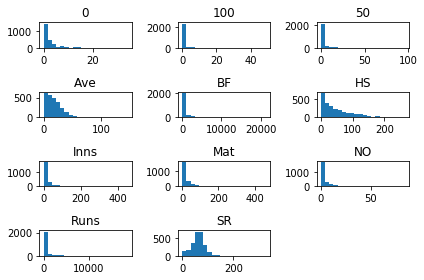

In [23]:
ax = plt.subplot(4,3,1)
ax.hist(batters['0'],bins=20);
ax.set_title('0')

ax = plt.subplot(4,3,2)
ax.hist(batters['100'],bins=20);
ax.set_title('100')

ax = plt.subplot(4,3,3)
ax.hist(batters['50'],bins=20);
ax.set_title('50')

ax = plt.subplot(4,3,4)
ax.hist(batters['Ave'],bins=20);
ax.set_title('Ave')

ax = plt.subplot(4,3,5)
ax.hist(batters['BF'],bins=20);
ax.set_title('BF')

ax = plt.subplot(4,3,6)
ax.hist(batters['HS'],bins=20);
ax.set_title('HS')

ax = plt.subplot(4,3,7)
ax.hist(batters['Inns'],bins=20);
ax.set_title('Inns')

ax = plt.subplot(4,3,8)
ax.hist(batters['Mat'],bins=20);
ax.set_title('Mat')

ax = plt.subplot(4,3,9)
ax.hist(batters['NO'],bins=20);
ax.set_title('NO')

ax = plt.subplot(4,3,10)
ax.hist(batters['Runs'],bins=20);
ax.set_title('Runs')

ax = plt.subplot(4,3,11)
ax.hist(batters['SR'],bins=20);
ax.set_title('SR')

plt.tight_layout()

#### Baller's Dataset

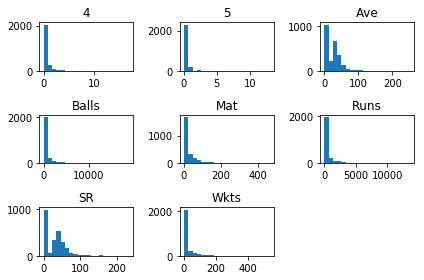

In [24]:
ax = plt.subplot(3,3,1)
ax.hist(ballers['4'],bins=20);
ax.set_title('4')

ax = plt.subplot(3,3,2)
ax.hist(ballers['5'],bins=20);
ax.set_title('5')

ax = plt.subplot(3,3,3)
ax.hist(ballers['Ave'],bins=20);
ax.set_title('Ave')

ax = plt.subplot(3,3,4)
ax.hist(ballers['Balls'],bins=20);
ax.set_title('Balls')

ax = plt.subplot(3,3,5)
ax.hist(ballers['Mat'],bins=20);
ax.set_title('Mat')

ax = plt.subplot(3,3,6)
ax.hist(ballers['Runs'],bins=20);
ax.set_title('Runs')

ax = plt.subplot(3,3,7)
ax.hist(ballers['SR'],bins=20);
ax.set_title('SR')

ax = plt.subplot(3,3,8)
ax.hist(ballers['Wkts'],bins=20);
ax.set_title('Wkts')

plt.tight_layout()

#### Fielder's Dataset

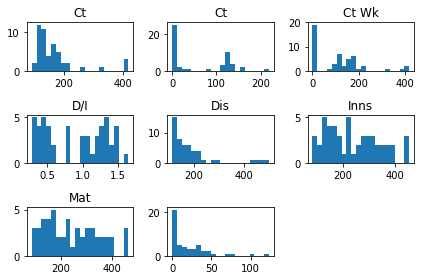

In [25]:
ax = plt.subplot(3,3,1)
ax.hist(fielders.Ct,bins=20);
ax.set_title('Ct')

ax = plt.subplot(3,3,2)
ax.hist(fielders['Ct Fi'],bins=20);
ax.set_title('Ct')

ax = plt.subplot(3,3,3)
ax.hist(fielders['Ct Wk'],bins=20);
ax.set_title('Ct Wk')

ax = plt.subplot(3,3,4)
ax.hist(fielders['D/I'],bins=20);
ax.set_title('D/I')

ax = plt.subplot(3,3,5)
ax.hist(fielders['Dis'],bins=20);
ax.set_title('Dis')

ax = plt.subplot(3,3,6)
ax.hist(fielders['Inns'],bins=20);
ax.set_title('Inns')

ax = plt.subplot(3,3,7)
ax.hist(fielders['Mat'],bins=20);
ax.set_title('Mat')

ax = plt.subplot(3,3,8)
ax.hist(fielders['St'],bins=20);
plt.tight_layout()

### Boxplots

#### Baller's Dataset

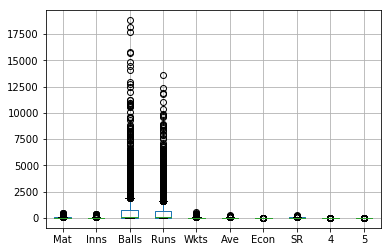

In [26]:
ballers[['Mat', 'Inns', 'Balls', 'Runs', 'Wkts', 'Ave', 'Econ','SR', '4', '5']].boxplot();

In [27]:
batters.columns

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
       '50', '0', 'start', 'end', 'Region'],
      dtype='object')

#### Batter's Dataset

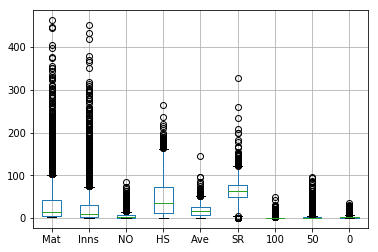

In [28]:
batters[['Mat', 'Inns', 'NO', 'HS', 'Ave', 'SR', '100', '50', '0']].boxplot();

#### Fielder's Dataset

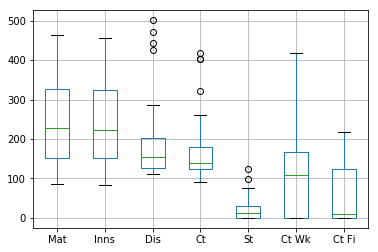

In [29]:
fielders[['Mat', 'Inns', 'Dis', 'Ct', 'St', 'Ct Wk', 'Ct Fi']].boxplot();